In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

            Sales2015     Sales2016
Region                             
Central  7.891729e+06  9.787809e+06
East     9.512916e+06  1.266723e+07
West     5.349745e+06  7.209689e+06


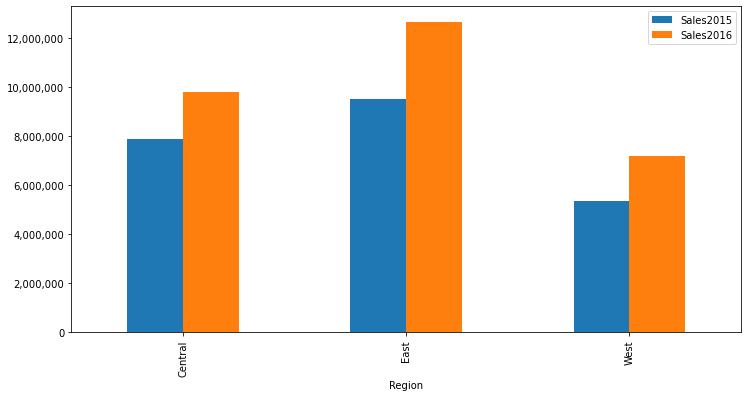

In [3]:
sales1 = sales.groupby(['Region'])[['Sales2015','Sales2016']].sum()
print(sales1)

sales1graph=sales1.plot.bar(figsize=(12,6))
y=['{:,.0f}'.format(x) for x in sales1graph.get_yticks()]
sales1graph.set_yticklabels(y)
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

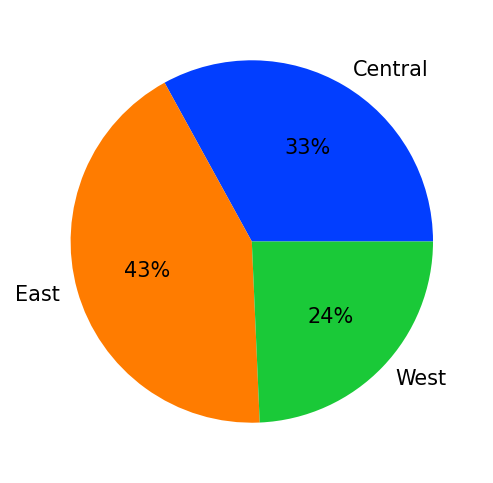

In [4]:
sales2 = sales.groupby(['Region'])['Sales2016'].sum()

plt.figure(dpi=150)
palette_color = sns.color_palette('bright')
plt.pie(sales2, labels=sales2.index, colors=palette_color, autopct='%.0f%%')
plt.show()


### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

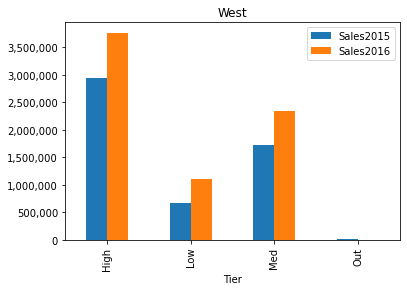

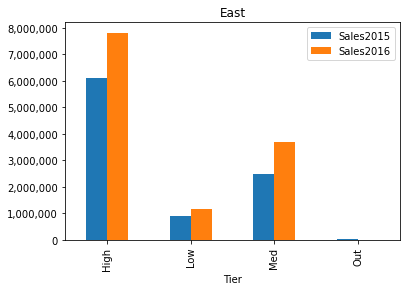

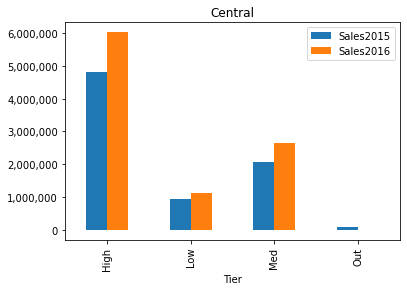

In [6]:
region = sales.Region.unique()
sales3 = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum().reset_index()

for i in range(3):
    sales3graph=sales3[sales3.Region==region[i]].drop(columns="Region").set_index("Tier").plot.bar()
    y=['{:,.0f}'.format(x) for x in sales3graph.get_yticks()]
    sales3graph.set_yticklabels(y)
    sales3graph.set_title(region[i])
    plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

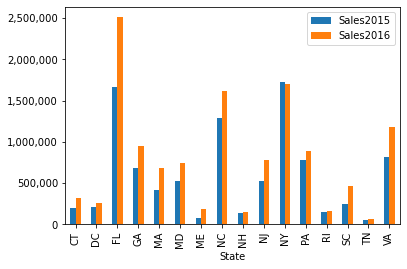

In [7]:
sales4=sales[sales.Region=="East"].groupby('State')[['Sales2015','Sales2016']].sum()
sales4graph=sales4.plot.bar()
y=['{:,.0f}'.format(x) for x in sales4graph.get_yticks()]
sales4graph.set_yticklabels(y)
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

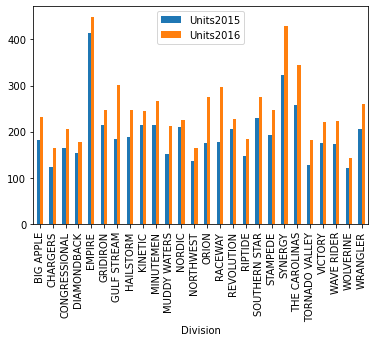

In [8]:
sales5=sales[sales.Tier=="High"].groupby('Division')[['Units2015','Units2016']].sum()
sales5graph=sales5.plot.bar()
y=['{:,.0f}'.format(x) for x in sales5graph.get_yticks()]
sales5graph.set_yticklabels(y)
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [9]:
def qrtr(x):
    if x in ['Jan','Feb','Mar']:
        return 'Q1'
    if x in ['Apr','May','Jun']:
        return 'Q2'
    if x in ['Jul','Aug','Sep']:
        return 'Q3'
    if x in ['Oct','Nov','Dec']:
        return 'Q4'
sales['Qtr'] = sales.Month.apply(qrtr)
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


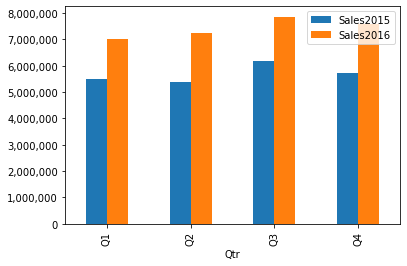

In [10]:
sales6=sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()
sales6graph=sales6.plot.bar()
y=['{:,.0f}'.format(x) for x in sales6graph.get_yticks()]
sales6graph.set_yticklabels(y)
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

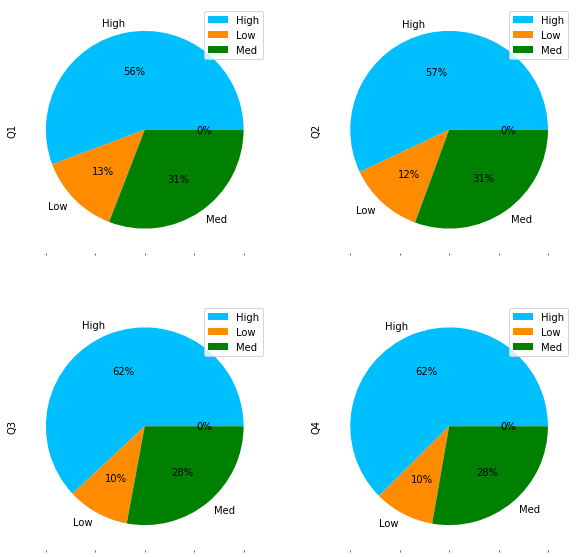

In [11]:
sales7=sales[sales.Sales2016 >= 0].groupby(['Qtr','Tier'])['Sales2016'].sum().round(decimals=0).unstack().T
sales7.plot(kind='pie', 
            colors=['deepskyblue', 'darkorange', 'green','red'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()